In this notebook we will train our neural network to detect Trump's tweets using the data we obtained in the data_extraction notebook.

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

First, let's extract our data and labels

In [2]:
infile = open("tweet_data",'rb')
data = pickle.load(infile)
infile.close()

In [3]:
infile = open("data_labels",'rb')
labels = pickle.load(infile)
infile.close()

Data is originally in the form of a numpy vector. For our model we just want to have a list. We make this conversion here

In [4]:
# Convert numpy input to regular list
data_list = []
for tweet in data:
    data_list.append(tweet[0].tolist())

And we will also pad the input sequence so the maximum length is 256. This is more than enough for Twitter

In [5]:
data_list= keras.preprocessing.sequence.pad_sequences(data_list,
                                                        value=10001,
                                                        padding='post',
                                                        maxlen=256)

Let's see the differnce between the original data and the pre-processed, padded data

In [6]:
data[568][0]

array([1445, 2265, 4522, 4922, 5255, 6157, 6614, 6953, 8298, 8771, 8921,
       9035, 9637], dtype=int32)

In [7]:
data_list[568]

array([ 1445,  2265,  4522,  4922,  5255,  6157,  6614,  6953,  8298,
        8771,  8921,  9035,  9637, 10001, 10001, 10001, 10001, 10001,
       10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001,
       10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001,
       10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001,
       10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001,
       10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001,
       10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001,
       10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001,
       10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001,
       10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001,
       10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001,
       10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001,
       10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001,
       10001, 10001,

Now we will split our data randomly in train data, test data, and validation data

In [8]:
data_train, data_test, label_train, label_test = train_test_split(data_list, labels, test_size=0.2, random_state=1)

In [9]:
partial_data_train, data_val, partial_label_train, label_val = train_test_split(data_train, label_train, test_size=0.2, random_state=1)

# Training the model

Finally we create a model with all the layers we will use. An embedding layer, a hidden layer with 16 hidden units, and one output layer

In [10]:
vocab_size = 10002

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

W0702 18:53:44.049793 4349027776 deprecation.py:506] From /Users/dgonzalez/.local/share/virtualenvs/TextClassificationTF-XtPpalaH/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0702 18:53:44.067229 4349027776 deprecation.py:506] From /Users/dgonzalez/.local/share/virtualenvs/TextClassificationTF-XtPpalaH/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160032    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,321
Trainable params: 160,321
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

W0702 18:53:44.126354 4349027776 deprecation.py:323] From /Users/dgonzalez/.local/share/virtualenvs/TextClassificationTF-XtPpalaH/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


We train during 10 epochs because after analysis we saw this was enoght not to under or over fit

In [12]:
history = model.fit(partial_data_train,
                    partial_label_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(data_val, label_val),
                    verbose=1)

Train on 64470 samples, validate on 16118 samples
Epoch 1/10
64470/64470 [==============================] - 1s 17us/sample - loss: 0.6423 - acc: 0.7318 - val_loss: 0.5833 - val_acc: 0.7461
Epoch 2/10
64470/64470 [==============================] - 2s 26us/sample - loss: 0.5701 - acc: 0.7431 - val_loss: 0.5625 - val_acc: 0.7461
Epoch 3/10
64470/64470 [==============================] - 1s 16us/sample - loss: 0.5634 - acc: 0.7431 - val_loss: 0.5571 - val_acc: 0.7461
Epoch 4/10
64470/64470 [==============================] - 1s 14us/sample - loss: 0.5542 - acc: 0.7431 - val_loss: 0.5429 - val_acc: 0.7461
Epoch 5/10
64470/64470 [==============================] - 1s 15us/sample - loss: 0.5310 - acc: 0.7431 - val_loss: 0.5101 - val_acc: 0.7461
Epoch 6/10
64470/64470 [==============================] - 1s 15us/sample - loss: 0.4864 - acc: 0.7455 - val_loss: 0.4556 - val_acc: 0.7631
Epoch 7/10
64470/64470 [==============================] - 1s 15us/sample - loss: 0.4219 - acc: 0.7892 - val_loss: 0.

In [13]:
results = model.evaluate(data_val, label_val)

print(results)

16118/16118 [==============================] - 0s 14us/sample - loss: 0.2688 - acc: 0.8937
[0.2688471740189136, 0.89365923]


Results look pretty good (~91% Accuracy). Let's try with some manual inputs

# Testing with new inputs

First we load the vectorizer we obtained in data_extraction. We need this to convert our inputs to a format we can input to the neural network

In [14]:
infile = open("vectorizer",'rb')
vectorizer = pickle.load(infile)
infile.close()

In [15]:
# Trump 2019
test = vectorizer.transform(["That’s right, The Trump Foundation gave away 100% plus, with Zero rent or expenses charged, and has been being sued by Cuomo and New York State for years - another part of the political Witch Hunt. Just in case anyone is interested - Clinton Foundation never even looked at!"])
testx = [sparse_row.indices for sparse_row in test]
testx = testx[0].tolist()
model.predict(np.array([testx]))

array([[0.99999964]], dtype=float32)

In [16]:
# Obama 2019
test = vectorizer.transform(["This is worth a read: a thought-provoking reminder that education reform isn’t a cure-all. As a supporter of education reform, I agree that fixing educational inequality requires doing more to address the broader, systemic sources of economic inequality."])
testx = [sparse_row.indices for sparse_row in test]
testx = testx[0].tolist()
model.predict(np.array([testx]))

array([[0.00124034]], dtype=float32)

In [17]:
#Hillary 2019
test = vectorizer.transform(["There's ample evidence that Republicans in office have pursued gerrymandered maps to shut out people of color from our political process. I'm disappointed but not surprised about today's anti-democratic decision."])
testx = [sparse_row.indices for sparse_row in test]
testx = testx[0].tolist()
model.predict(np.array([testx]))

array([[4.091459e-05]], dtype=float32)

In [18]:
# Obama 2019
tweet = "Last week, it was Virginia Beach. But day after day and year after year, too many families and communities are shattered by senseless gun violence. We can't get numb to this. On National Gun Violence Awareness Day, pledge to speak out, #WearOrange — and vote — to protect lives."
testx = [sparse_row.indices for sparse_row in  vectorizer.transform([tweet])][0].tolist()
model.predict(np.array([testx]))

array([[8.7476634e-05]], dtype=float32)

In [19]:
# Trump 2019
tweet = "Bipartisan Humanitarian Aid Bill for the Southern Border just passed. A great job done by all! Now we must work to get rid of the Loopholes and fix Asylum. Thank you also to Mexico for the work being done on helping with Illegal Immigration - a very big difference!"
testx = [sparse_row.indices for sparse_row in  vectorizer.transform([tweet])][0].tolist()
model.predict(np.array([testx]))

array([[0.9999263]], dtype=float32)

In [20]:
# Testing custom input
tweet = "BORING!"
testx = [sparse_row.indices for sparse_row in  vectorizer.transform([tweet])][0].tolist()
model.predict(np.array([testx]))

array([[1.]], dtype=float32)

In [21]:
# Trump 2019
tweet = "According to Fake News (and low ratings) @CNN, “Democrats say hearings could change impeachment debate.” That’s because they have lost the impeachment debate (80% say NO), and they are hoping that yet another DO OVER, after 2 1/2 years and $40,000,000, will turn things around...."
testx = [sparse_row.indices for sparse_row in  vectorizer.transform([tweet])][0].tolist()
model.predict(np.array([testx]))

array([[0.99996936]], dtype=float32)

In [22]:
# Hillary
tweet = "The attack on Title X is not isolated. It’s clear that politicians who oppose reproductive health care are coming not just for abortion access, but all reproductive health care. It's up to all of us to fight back. #ProtectX"
testx = [sparse_row.indices for sparse_row in  vectorizer.transform([tweet])][0].tolist()
model.predict(np.array([testx]))

array([[0.00274609]], dtype=float32)

Results look promissing! Finally, let's take a look at our accuracy and loss curve over time

# Accuracy and loss over time

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [24]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

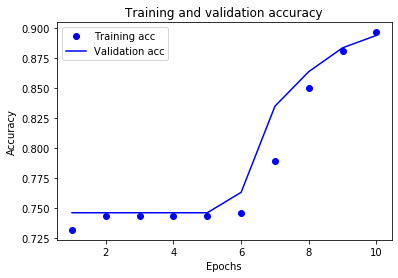

In [25]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Save model

Now that we have validated our model, we save it so we can load it and use it in our app later on

In [26]:
tf.keras.models.save_model(
    model,
    './trump_model',
    overwrite=True,
    include_optimizer=True,
    save_format=None
)